<p>Before stating with code, we all should know the importance of data as understanding that <em>"data is power"</em>.<br>
in the next section we will give you all some insights, knowledge and lots more about customer leaving or staying by only analyizing and visualizing data.<br>
you all shall now see how some numbers can be so powerfull.<br>

<h1>Importing Packages:</h1><br>
in this section we mainly importing packages we will use in our code, in the following few lines we will demonstrate the usage of each one

1 - matplotlib & seaborn & plotly: matplotlib provides use with visualization tools<br>
2 - pandas : provides use with the tools to import our data and manipulate it<br>
3 - warnings : from its name it is about warning <span>&#128514;</span><br>

In [2]:
#To work with data frames & arrays
import pandas as pd
import numpy as np

#Visualization & Analysis
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import scipy.stats as st

#Preprocessing
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from scipy import stats

#Models & parameters Tuning
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

#Models Evaluation
from scipy.stats import pearsonr
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report , roc_curve, f1_score, accuracy_score, recall_score , roc_auc_score,make_scorer
from sklearn import metrics
import time

import warnings
warnings.filterwarnings("ignore")

Obviously, here are loading the data we are going to work with

In [3]:
df=pd.read_csv("Churn_Modelling.csv")

Churn : is a data set of informtion about customer that we feed the the machine so it can tell use if he/she is going to leave or stay<br>
the Data set consistes of 14 columns with 10 features and one target, in the following we will demo each feature<br>
1 - CreditScore : it represents the creditworthiness of the customer<br>
2 - Geography : is the countery were the customer is currently living<br>
3 - Gender : this obviously the customer gender (female or male) <span>&#128514;</span><br>
4 - Age : the customer age<br>
5 - tenure : period or duration for which the loan amount is sanctioned<br>
6 - Balance : jow much money the customer has<br>
7 - NumOfProducts : is the number of bank retail products the customer uses<br>
8 - HasCrCard : tells whether the customer has creadit card or no<br>
9 - IsActiveMember : the state of activation of the customer<br>
10 - EstimatedSalary : the annual salary of the customer<br>
<br>
<br>
<br>
<br>

Here is a glance on the data

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The statistical describtion of the data

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Summary statistics

* We have total 10K customers record with us.
* Our customer Credit Score ranges from 350 to 850 as maximum
* We have minimum customer's age as 18 years and maximum age of 92 years
* The maximum tenure of any customer with our bank is 10 years
* The customers are using atleast one of our bank product and maximum 4 products
* Alot of customers are holding a credit card and we have customers without any credit card as well.
* Our Customer's Estimated Salaries ranges from 11💵 to 199992 💵 as maximum

Basic information about the data like how much null values in each row<br>
and how many rows and columns are there in the set, also the data type of each column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


the isnull methos returns the number of missing values in a column  

In [7]:
df.isnull().values.any()

False

the duplicated method returns the number of duplicated rows

In [8]:
df.duplicated().any()

False

Here we make a copy of the data so the original data are not effected<br>
the copy method is used for this

In [9]:
df2 = df.copy()

in the following code we replaced each binary class with a text that describs its meaning as an example the in the exited column we replaced zero with Stayed, so it is now easy to read and understand

In [10]:
df2 = df2.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

<br>
<br>
<br>
simply in the following code we mapped each binary class to a corresponding label
using the map method
then we renamed column names so it can be more readable

In [11]:
df2.HasCrCard = df2.HasCrCard.map({0: 'No CreditCard', 1: 'Has CreditCard'})
df2.IsActiveMember = df2.IsActiveMember.map({0: 'Inactive', 1: 'Active'})
df2.Exited = df2.Exited.map({0: 'Stayed', 1: 'Exited'})
df2.rename(columns={'Exited':'Status'},inplace = True)
df2.rename(columns={'HasCrCard':'CreditCard'},inplace = True)
df2.rename(columns={'IsActiveMember':'Activity'},inplace = True)

In [12]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,CreditCard,Activity,EstimatedSalary,Status
0,619,France,Female,42,2,0.00,1,Has CreditCard,Active,101348.88,Exited
1,608,Spain,Female,41,1,83807.86,1,No CreditCard,Active,112542.58,Stayed
2,502,France,Female,42,8,159660.80,3,Has CreditCard,Inactive,113931.57,Exited
3,699,France,Female,39,1,0.00,2,No CreditCard,Inactive,93826.63,Stayed
4,850,Spain,Female,43,2,125510.82,1,Has CreditCard,Active,79084.10,Stayed


this code below is responsable for plotting how features are distributed over the number of customers

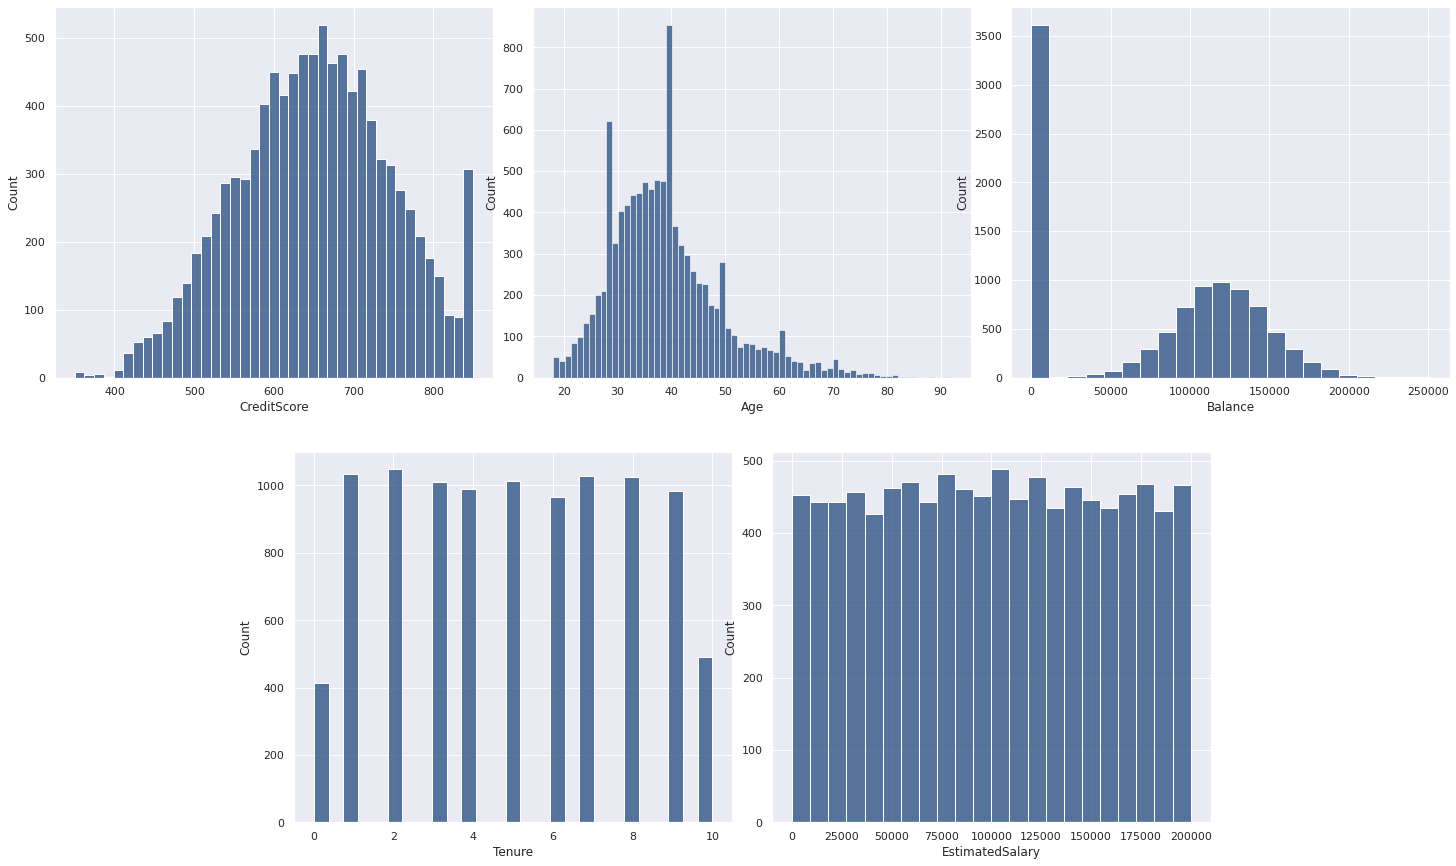

In [13]:
# Distributions
sns.set(rc={'figure.figsize':(25,15)})
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
sns.set_theme(palette="crest_r")
sns.histplot(data = df,x = "CreditScore",ax=ax1)
sns.histplot(data = df,x = "Age",ax=ax2)
sns.histplot(data = df,x = "Balance",ax=ax3)
sns.histplot(data = df,x = "Tenure",ax=ax4)
sns.histplot(data = df,x = "EstimatedSalary",ax=ax5)

so in the first three we can see that the distribution in a billmber of cun curve (Gaussian distribution), how ever the second two are not seamingly bill curve like.

### **Highlights:**


*   Credit Score : Normally distributed with mean 650 ranges between 400 and 830
*   Age : Majority of customers ages range between 29 and 40 years old 
*   Balance : Majority of customers are normally distributed except around 3600 customer have ZERO bank balance
*   Estimated Salary of our customers are uniformly distributed means we have around the same number of customers for all different estimated salaries.



<br>
<br>
<br>
<br>

<h1><em>Let's dive more deeper in the data</em></h1>

let's plot the number customer per geographical regone. <br>
<h4>How ?</h4><br>
first you need to know how many customer are there in each class, this is done in line 2 by making the values list
in which we got the number of customer using the count methode.
then we plot it in a pie shape using plotly visualization package "<code>import plotly.graph_objects as go</code>"

In [14]:
labels = ['Germany','France','Spain']
values = [df.Geography[df['Geography']=='Germany'].count(),df.Geography[df['Geography']=='France'].count(),df.Geography[df['Geography']=='Spain'].count()]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0, 0])])
fig.update_layout(title='Geography')
fig.show()

regardless of how beautiful it is, we can see that 50.1% customers are in France, 25.1% in Germany and 24.8% are in Spain<br>
<h4>How does this help ?</h4>
i will tell you how it help, looking the percentage of customers in span and germany we can see that we need to do more effort there.

**Most customers are from France**




<br>
<br>
<br>
in the following code we simply how many customer in each gender 

In [15]:
px.pie(df, names='Gender',hole=0.5 , title = 'Gender')

looking to the pie we see that most of the customers are males but the ratio between both gender is not the great deal

here we done the same like the geography but now the categories are the products

In [16]:
labels = ['1 Product','2 Product','3 Product','4 Product']
values = [df.NumOfProducts[df['NumOfProducts']==1].count(),df.NumOfProducts[df['NumOfProducts']==2].count(),df.NumOfProducts[df['NumOfProducts']==3].count(),df.NumOfProducts[df['NumOfProducts']==4].count()]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(hole=0.5,labels=labels, values=values, pull=[0, 0, 0.2,0.4])])
fig.update_layout(height= 700, title='Number of Products')

fig.show()

looking to the graph it is clear that the bank need to encourage the customers to use more products
as most of the customers are using one or two products, and very much less customers are using three or four products

<br>
<br>
<br>
<br>
in the following chart we are plotting the number of customer in each class of Active feature and creditCard feature as a hist

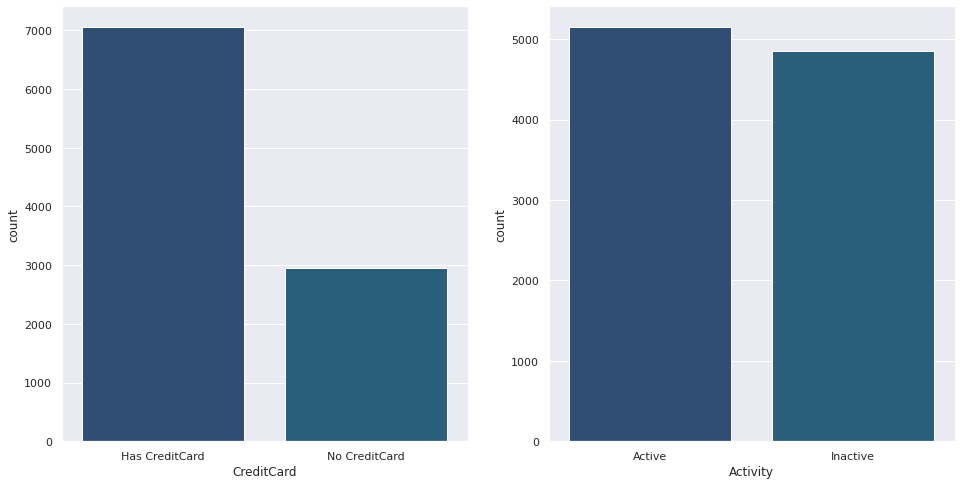

In [17]:
sns.set(rc={'figure.figsize':(16,8)})
fig,axs = plt.subplots(1,2)
sns.set_theme(palette="crest_r")
sns.countplot(data = df2,x = "CreditCard",ax=axs[0])
sns.countplot(data = df2,x = "Activity",ax=axs[1])

looking the charts we see that most of customers has creadit card which is a good thing but there are many customers that don't use it so bank might consider doing more marketing<br>
also the number of inactive customers is large and this is a problem the managment sector should consider, however, number of active customer is larger

<br>
<br>
<br>
<br>
in the following code we plot hoe many users exit or stayed 
using the same method as with geography to get the list of user counts per class

In [18]:
labels = ['Exited','Stayed']
values = [df2.Status[df2['Status']=='Exited'].count(),df2.Status[df2['Status']=='Stayed'].count()]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0])])
fig.update_layout(title='Status')
fig.show()

**~80% of customers stay at the bank**


<br>
<br>
<br>
here we will plot the creadit score of customer separately based on there status, so we will see that the customer who wxited in a different colour from those who stayed

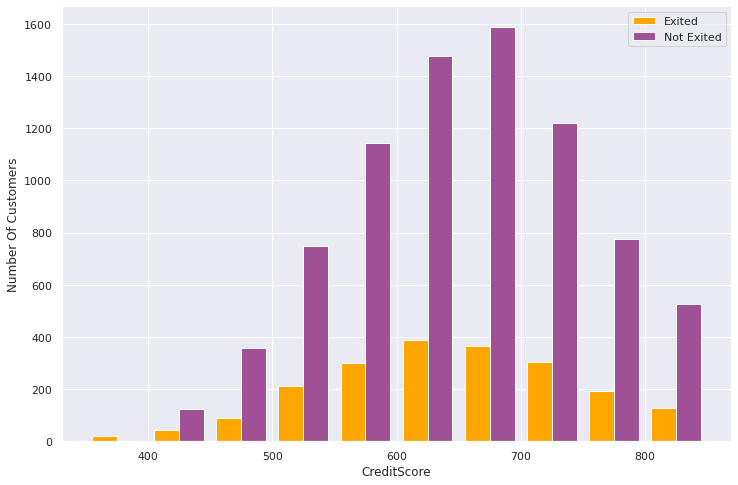

In [19]:
#getting the ceadit score of the people who exited
CreditScore_Exited = df[df.Exited == 1].CreditScore
#getting the ceadit score of the people who stayed
CreditScore_NotExited = df[df.Exited == 0].CreditScore
plt.figure(figsize=(12,8)) 
plt.xlabel("CreditScore")
plt.ylabel("Number Of Customers")
plt.hist([CreditScore_Exited,CreditScore_NotExited],label=['Exited','Not Exited'], color=['#ffa600', '#a05195'])
plt.legend()

In [20]:
px.histogram(df2, x='CreditScore', color='Status',color_discrete_sequence = ['#ffa600', '#a05195'],title= 'Relation between Credit Score and Status')

**By looking at the credit Score it is hard to tell whether the customer tends to Exit or not because the behaviour are almost same for both. So Credit Score can't be considered as a perfect Feature.**


---
##### We have 19 customers who had less than a 400 credit score and exited the bank.






<br>
<br>
<h1>Now we go more deeper</h1>

now we go more complex and plot relation between greograph and status

In [21]:
fig = px.sunburst(df2, path=['Geography', 'Status'],title= 'Relation between Geography and Status')
fig.update_traces(textinfo='label + percent parent')

so we see that the ratio between the exited customer and customers per countery is the smallest in France then Spain and the heighest is Germany<br>
what is wrong with German people!

**Germany has the highest percentage of exited customers and France has the highest percentage of staying customers.**




<br>
<br>
lets do the same but for Gender and status

In [22]:
fig = px.sunburst(df2, path=['Gender', 'Status'],title= 'Relation between Gender and Status')
fig.update_traces(textinfo='label + percent parent')

from the chart we see that the ratio between female how left is heigher than males how left 

**Males tend to stay at the bank more than Females**

lets look at the relation between age and status

In [23]:
px.histogram(df2, x='Age', color='Status',color_discrete_sequence = ['#ffa600', '#a05195'],title= 'Relation between Age and Status')

**Age shows significant difference in order to identify the customer churn, The oldest customers tends to churn more as compared to young ones.**


In [24]:
px.box(df2, x='Tenure', color='Status',title= 'Relation between Tenure and Status')

The box plot shows that customers stay at the bank for between 3 and 7 years.
The customers who exited the bank stayed for 2 to 8 years.

**The behaviour are almost same for both. So Tenure can't be considered as a perfect Feature.**


In [25]:
px.histogram(df2, x='Balance', color='Status',color_discrete_sequence = ['#ffa600', '#a05195'],title= 'Relation between Balance and Status')

The graph is normally distributed.

**The behaviour are almost same for both. So Balance can't be considered as a perfect Feature.**


now we see relation between number of products and status

In [26]:
fig = px.sunburst(df2, path=['NumOfProducts', 'Status'],title= 'Relation between Number of Products and Status')
fig.update_layout(height= 700)
fig.update_traces(textinfo='label + percent parent')

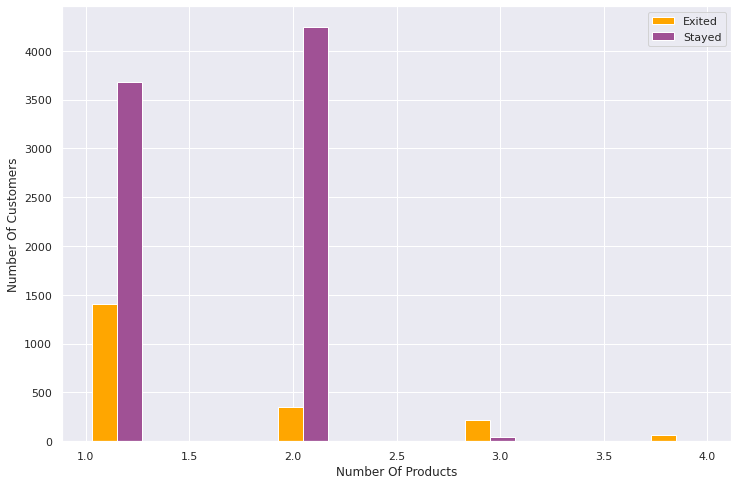

In [27]:
CreditScore_Exited = df[df.Exited == 1].NumOfProducts
#getting the ceadit score of the people who stayed
CreditScore_NotExited = df[df.Exited == 0].NumOfProducts
plt.figure(figsize=(12,8)) 
plt.xlabel("Number Of Products")
plt.ylabel("Number Of Customers")
plt.hist([CreditScore_Exited,CreditScore_NotExited],label=['Exited','Stayed'], color=['#ffa600', '#a05195'])
plt.legend()

**We see that half the customers subscribe to only 1 product, and the rest mostly subscribe to 2 products (a small fraction subscribe to 3 and 4 products). But while 28% of the customers subscribing to only 1 product exit, only 8% of those subscribing to 2 products do so. So, we see that the number of products is a perfect feature to use.**

now we see relation between hasCreditCard and status

In [28]:
fig = px.sunburst(df2, path=['CreditCard', 'Status'],title= 'Relation between Credit Card and Status')
fig.update_traces(textinfo='label + percent parent')

****We have almost the same ratio of customer churn in both cases.****

now we see relation between number of Activity and status

In [29]:
fig = px.sunburst(df2, path=['Activity', 'Status'],title= 'Relation between Activity and Status')
fig.update_traces(textinfo='label + percent parent')

**Inactive customers tend to exit the bank almost 2 times the active customers.**

In [30]:
px.histogram(df2, x='EstimatedSalary', color='Status',color_discrete_sequence = ['#ffa600', '#a05195'],title= 'Relation between Estimated Salary and Status')

**Estimated Salary shows same behavoiur for both status**



let's see the spermann correlation to see with features are related the most to the target

In [31]:
# Correlations among columns
corr=df.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004187,0.005130,0.000476,-0.006934,-0.009013,0.008305,0.000599,0.012044,-0.006007,-0.016571
CustomerId,0.004187,1.000000,0.005967,0.008775,-0.015072,-0.013932,0.019297,-0.014023,0.001682,0.015246,-0.006264
CreditScore,0.005130,0.005967,1.000000,-0.007974,0.001133,0.005687,0.012568,-0.003802,0.024262,0.001237,-0.023289
Age,0.000476,0.008775,-0.007974,1.000000,-0.010405,0.033304,-0.058566,-0.015278,0.039839,-0.002431,0.323968
Tenure,-0.006934,-0.015072,0.001133,-0.010405,1.000000,-0.009513,0.012908,0.022354,-0.028673,0.007778,-0.013978
Balance,-0.009013,-0.013932,0.005687,0.033304,-0.009513,1.000000,-0.316627,-0.009835,-0.011497,0.011778,0.111110
NumOfProducts,0.008305,0.019297,0.012568,-0.058566,0.012908,-0.316627,1.000000,0.003859,0.016292,0.012570,-0.125282
HasCrCard,0.000599,-0.014023,-0.003802,-0.015278,0.022354,-0.009835,0.003859,1.000000,-0.011866,-0.010041,-0.007138
IsActiveMember,0.012044,0.001682,0.024262,0.039839,-0.028673,-0.011497,0.016292,-0.011866,1.000000,-0.011469,-0.156128
EstimatedSalary,-0.006007,0.015246,0.001237,-0.002431,0.007778,0.011778,0.012570,-0.010041,-0.011469,1.000000,0.012081


Text(0.5, 1.0, 'correlation')

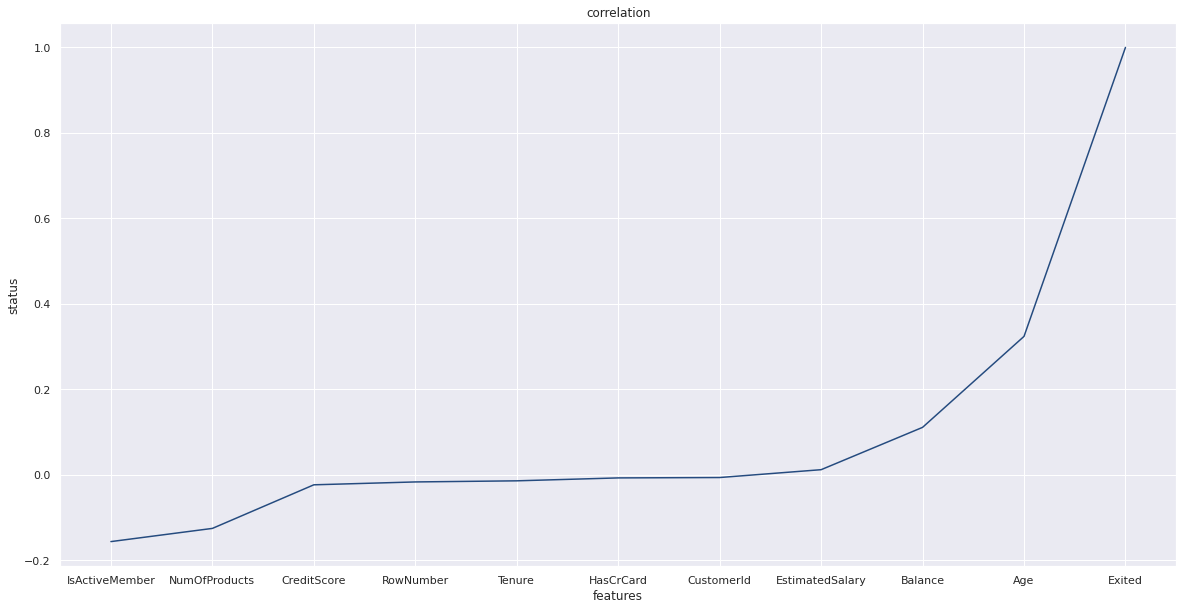

In [32]:
Exited_relation = corr["Exited"].sort_values(ascending=True)
plt.figure(figsize=(20, 10))
plt.plot(Exited_relation)
plt.xlabel("features")
plt.ylabel("status")
plt.title("correlation")


now it is easy to say that Salary, Balance and Age are closely related to status

**As shown in the correlation plot that Age was related to Exited Status.**

In [33]:
df2.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,CreditCard,Activity,EstimatedSalary,Status
0,619,France,Female,42,2,0.0,1,Has CreditCard,Active,101348.88,Exited


## Insights from EDA:
Based on our EDA the features that drive this process or an important one to identify customers churns are :
* Geography
* Gender
* Age
* NumOfProducts
* Activity






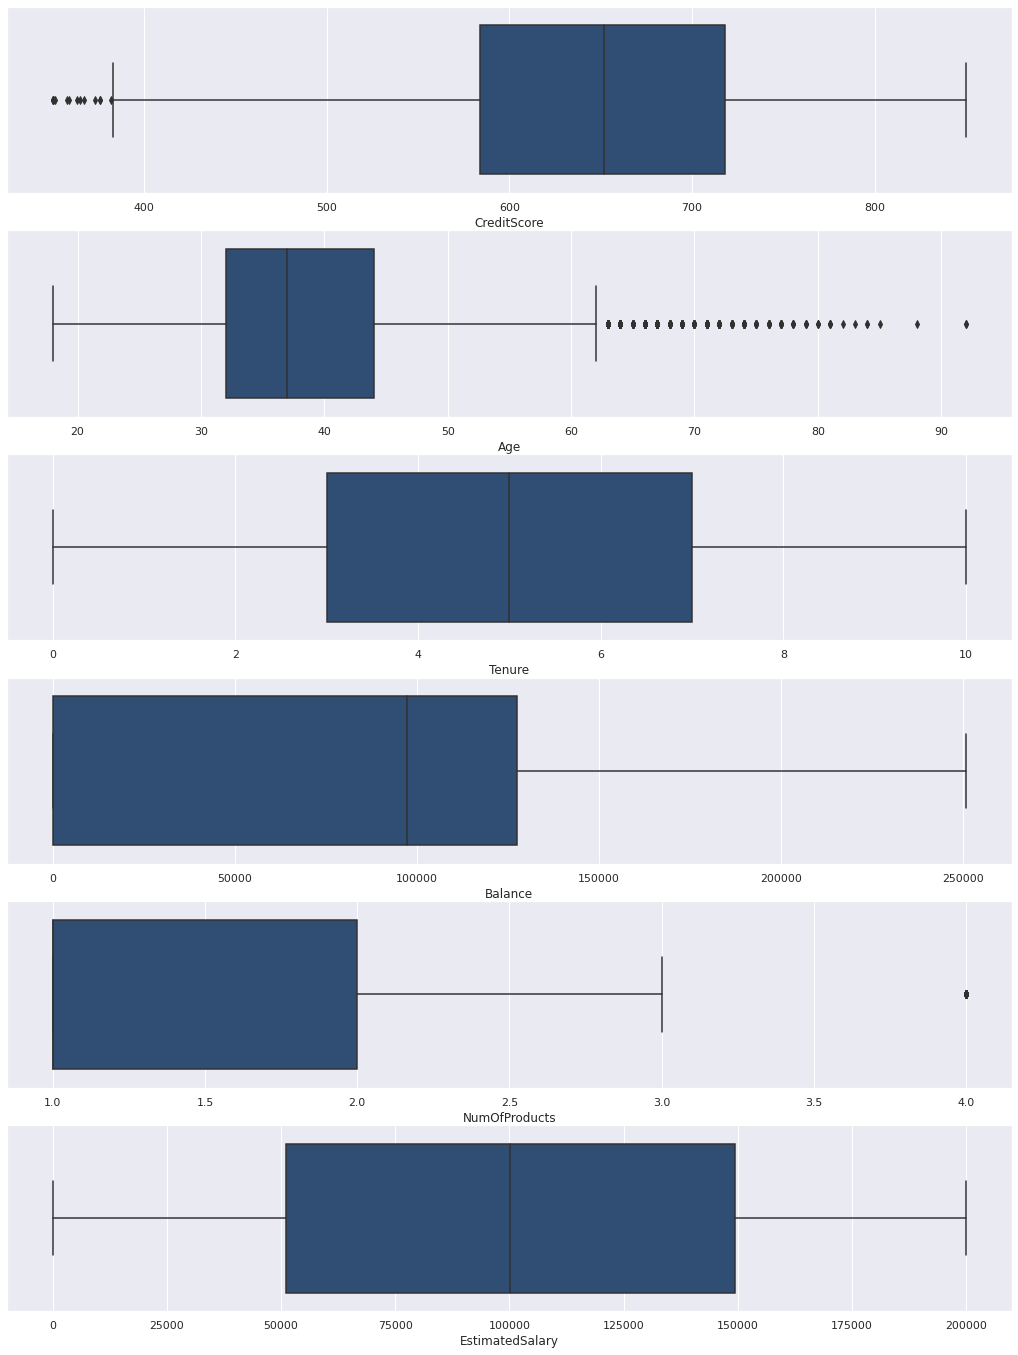

In [34]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
fig, ax = plt.subplots(6, 1, figsize=(18,24))
for i in range(6):
    sns.boxplot(x = df2[num_cols[i]], ax=ax[i])

**There are outliers in all of numberical columns, so I need to handle them, I choose to cap the outliers by move them to upper and lower bound**

**I used Interquartile Range Method to remove the outliers.**

We can use the IQR method of identifying outliers to set up a “fence” outside of Q1 and Q3. Any values that fall outside of this fence are considered outliers. To build this fence we take 1.5 times the IQR and then subtract this value from Q1 and add this value to Q3. This gives us the minimum and maximum fence posts that we compare each observation to. Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.

In [35]:
for col in num_cols:
  # calculate interquartile range
  Q1 = df2[col].quantile(0.25)
  Q3 = df2[col].quantile(0.75)
  IQR = Q3 - Q1
  #calculate the outlier cutoff
  S = 1.5*IQR
  LB = Q1 - S
  UB = Q3 + S
  # identify outliers
  df2.loc[df2[col] > UB,col] = UB
  # remove outliers
  df2.loc[df2[col] < LB,col] = LB

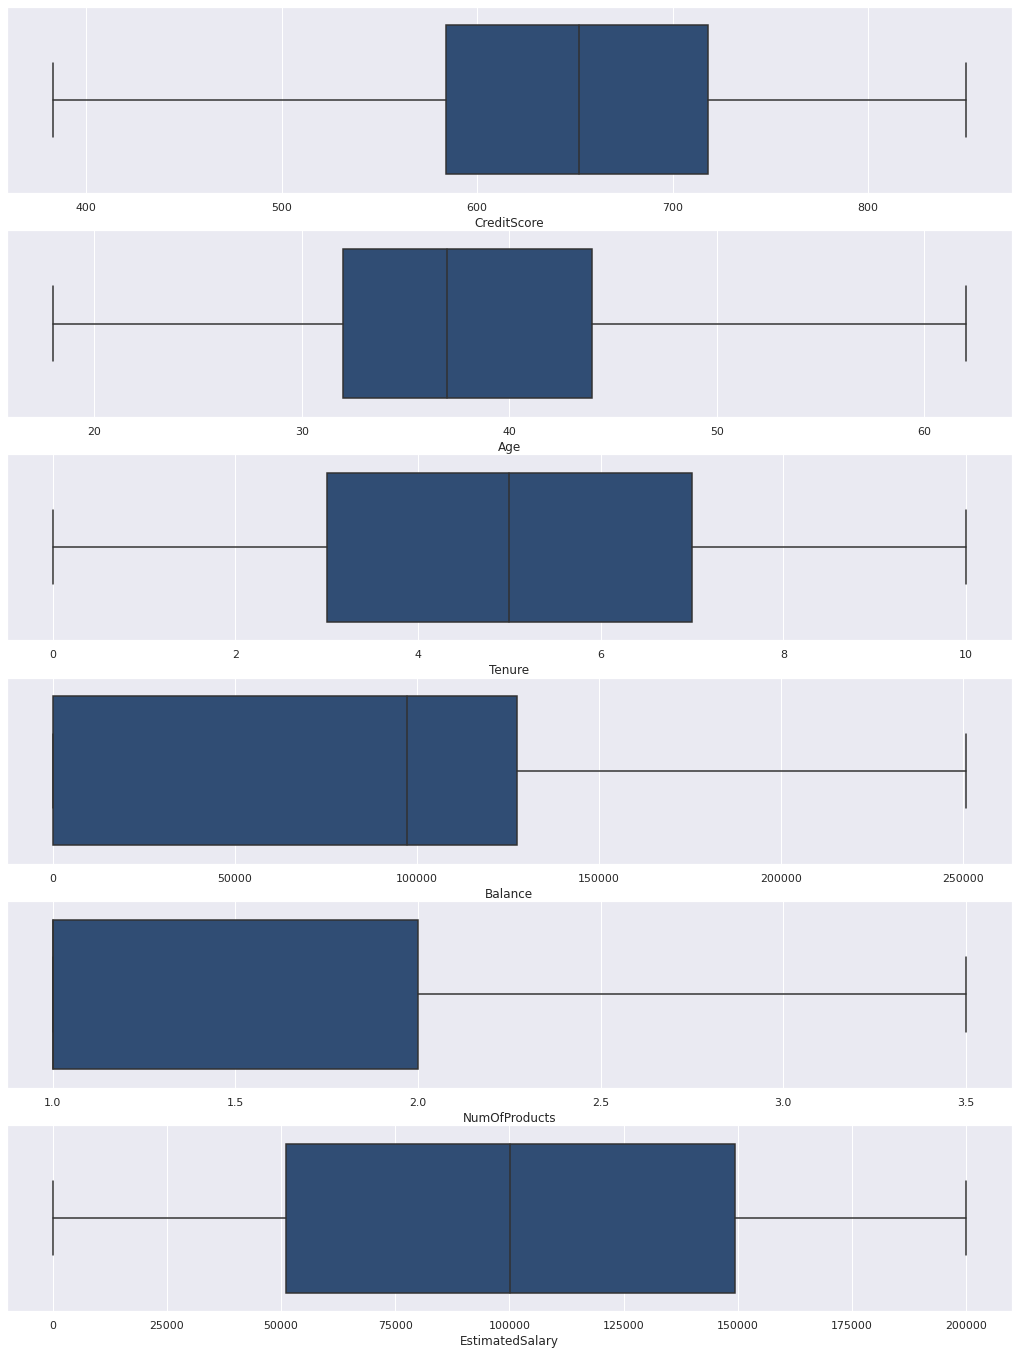

In [36]:
fig, ax = plt.subplots(6, 1, figsize=(18,24))
for i in range(6):
    sns.boxplot(x = df2[num_cols[i]], ax=ax[i])

<br>
<br>
<br>
<br>
<br>
<h4>Now after we visualized and analized the Data, let's go preprocess it so the model then can work with it</h4>
<h1>Preprocessing</h1>

first let's rome those columns we won't use

In [37]:
data = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

previously when we analyzied the data we found that there were some values that were object type, this is a problem as tree works only with numarical data.
<h4>So, What do we do now ?</h4>
simply we will just encode these object type featues into numbers so the model algorithm works well with it.

In [38]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


here now we know that Geography and Gender are object type so we will now encode them all to numbers

<h1>How do we do it?</h1>
it is easy we will only use LabelEncoder from sklearn.preprocessing

In [39]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

in this part we will incode Geography to one hot encoding as it is many  categories

we will use the lable Binarizer which returns a one hot matrix of features

In [40]:
from sklearn.preprocessing import LabelBinarizer
jobs_encoder = LabelBinarizer()
jobs_encoder.fit(data["Geography"])
transformed = jobs_encoder.transform(data["Geography"])
ohe_df = pd.DataFrame(transformed)
data = pd.concat([data, ohe_df], axis=1).drop(["Geography"], axis=1)
# Geography 0-France,1-Germany,2-Spain

In [41]:
#data = pd.get_dummies(data=data, columns=['Geography'])

In [42]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,0,1,2
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [43]:
data.rename(columns = {0:'France', 1:'Germany',2:'Spain'},inplace=True)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1




# Covariance


now let's have a look at the covariance between those attributes

as visualized data is easy to understand let's look to the covariance like a heat map

['CreditScore' 'Gender' 'Age' 'Tenure' 'Balance' 'NumOfProducts'
 'IsActiveMember' 'EstimatedSalary' 'Exited' 'France' 'Germany']


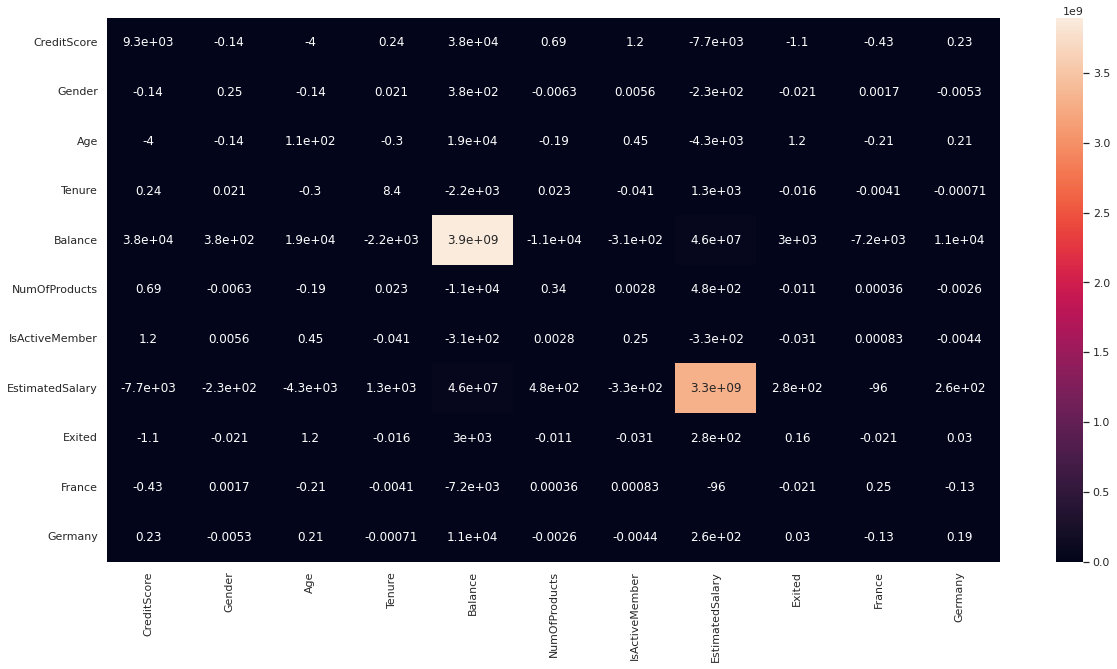

In [44]:
#Get the covariance between the data
covar = data.cov()

# Top covariance training features with the diagnosis
top_feature = covar.index[abs(covar['Exited']) >= 0.01]

# Top Features Affecting the Value of Diagnostics
print(top_feature.values)


#Dealing with high-quality features only
Important_Data =data[top_feature.values]

# plotting The covariance as a heat map
plt.subplots(figsize=(20, 10))
top_covar = data[top_feature].cov()
sns.heatmap(top_covar, annot=True)
plt.show()

# P_VALUE
The validity of the relationship between the features and the The label[Exited] must be confirmed by p_value


# Good P_VALUE <= 0.05  "It does not come by chance"

In [45]:
P_value = pd.DataFrame (columns = ['Correlation','P_Value'])
for col in data:
  r, p = stats.pearsonr(data['Exited'],data[col])
  P_value.loc[col] = [round(r,3),round(p,3)]

In [46]:
P_value.head(data.shape[0])

,Correlation,P_Value
CreditScore,-0.027,0.007
Gender,-0.107,0.000
Age,0.285,0.000
Tenure,-0.014,0.162
Balance,0.119,0.000
NumOfProducts,-0.048,0.000
HasCrCard,-0.007,0.475
IsActiveMember,-0.156,0.000
EstimatedSalary,0.012,0.226
Exited,1.000,0.000


<br>
<br>
<br>
now let's divide our data to X, y that means features and targets

to obtain X we only droped the Exited column which is also the target

In [47]:
X = data.drop(['Exited'],axis=1)
Y = data.Exited

lets se how X, y look like

In [48]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [49]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [50]:
model=RandomForestClassifier()
selector=RFE(estimator=model,n_features_to_select=9)
selector.fit(X,Y)
selected_feat = data.columns[selector.get_support(indices=True)]
print(selected_feat)
data[selected_feat].head()

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'France'],
      dtype='object')


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,1
4,850,43,2,125510.82,1,1,1,79084.10,0


<h4>Dealing with unbalanced data</h4>

lets see how many values in each class of the target vector using the count method

In [51]:
class1 = Y[Y==1].count()
class2 = Y[Y==0].count()
print(class1)
print(class2)

2037
7963


as we saw the data is clearly impalanced

lets se if a XGBoost Classifier will do good with it.

In [52]:
#best model before Data balance
X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,random_state=42,test_size=0.20,shuffle=True)
model=XGBClassifier(gamma=0.001, learning_rate=0.3, max_depth=8, random_state=42)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
yhat = model.predict_proba(X_test)
pos_probs = yhat[:, 1]
roc_auc = roc_auc_score(Y_test, pos_probs)
print('ROC AUC: '+(str(roc_auc)))
print(classification_report(Y_train,  model.predict(X_train)))
print(classification_report(Y_test,  model.predict(X_test)))

ROC AUC: 0.8417530809071635
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6356
           1       1.00      0.96      0.98      1644

    accuracy                           0.99      8000
   macro avg       0.99      0.98      0.99      8000
weighted avg       0.99      0.99      0.99      8000

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.68      0.49      0.57       393

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



it did good 

now let's use anaother model like GradientBoost and see what happens

In [53]:
x_train,x_test,y_train,y_test =  train_test_split(X,Y,random_state=42,test_size=0.20,shuffle=True)
model=GradientBoostingClassifier(random_state = 12345,learning_rate = 0.05, max_depth = 5, min_samples_split = 2, n_estimators = 500, subsample = 0.8)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
yhat = model.predict_proba(X_test)
pos_probs = yhat[:, 1]
roc_auc = roc_auc_score(Y_test, pos_probs)
print('ROC AUC: '+(str(roc_auc)))
print(classification_report(y_train,  model.predict(x_train)))
print(classification_report(y_test,  model.predict(x_test)))

ROC AUC: 0.8628946830897268
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      6356
           1       0.96      0.74      0.84      1644

    accuracy                           0.94      8000
   macro avg       0.95      0.87      0.90      8000
weighted avg       0.94      0.94      0.94      8000

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.74      0.50      0.60       393

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



it also did good but we will solve the balance problem

we will do over sampling and under sampling using SMOTE and RandomUnderSampler

In [54]:
oversample = SMOTE()
undersample = RandomUnderSampler()

steps = [("o",oversample), ("u",undersample)]
pipline = Pipeline(steps = steps)
X,Y = pipline.fit_resample(X,Y)

In [55]:
class1 = Y[Y==1].count()
class2 = Y[Y==0].count()
print(class1)
print(class2)

7963
7963


now as we saw the data is perfectly balanced

let's visiualize it to be more clear

In [56]:
labels = ['Exited','Stayed']
values = [class1,class2]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0])])
fig.update_layout(title='Status')
fig.show()

so after Preprocessing and all that stuf let's perceed to the finaly by creating models that will be ready to debloy

in the next cell we splitted thae data to train and test part: train is for training the model and test is for evaluation<br>
we used train_test_split() from sklearn.model_selection, also we now have a 20% percent of our data for testing and 80% for training the models

In [57]:
x_train,x_test,y_train,y_test =  train_test_split(X,Y,random_state=42,test_size=0.20)

In [58]:
x_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
13555,567,1,42,3,145063.027002,1,1,1,196419.485024,0,0,0
1665,768,1,42,5,0.000000,3,0,0,60686.400000,1,0,0
14878,625,1,49,6,173434.900000,1,1,0,165580.930000,1,0,0
7471,638,0,36,6,0.000000,1,1,0,164247.510000,1,0,0
2582,652,1,37,7,0.000000,2,1,0,68789.930000,0,0,1


#The data is ready to train & test the model

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(12740, 12)
(12740,)
(3186, 12)
(3186,)


DecisionTree Classifier is one of th most used machine learning algorithms used today as it is accurate, not affected by outliers, does not need scalling and lot more<br>
Decision Trees are like rule based systems but instead of telling it the rules it descovers them itself.

the next cell we will craet, train(fit) and test an model to see how accurate it is

Decision tree here have max depth of 10 and uses entropy insteadof gini

Training time : 0.06682205200195312 Seconds
Testing accuracy   : 85.37350910232266 %
MSE [TEST]          : 0.14626490897677338
Training accuracy  : 90.0784929356358 %
MSE [TRAIN]         : 0.09921507064364207
precision :  0.8571428571428571
recall    :  0.8462998102466793
f1_score  :  0.8516868236791851
ROC_AUC   :  0.9036051160490325


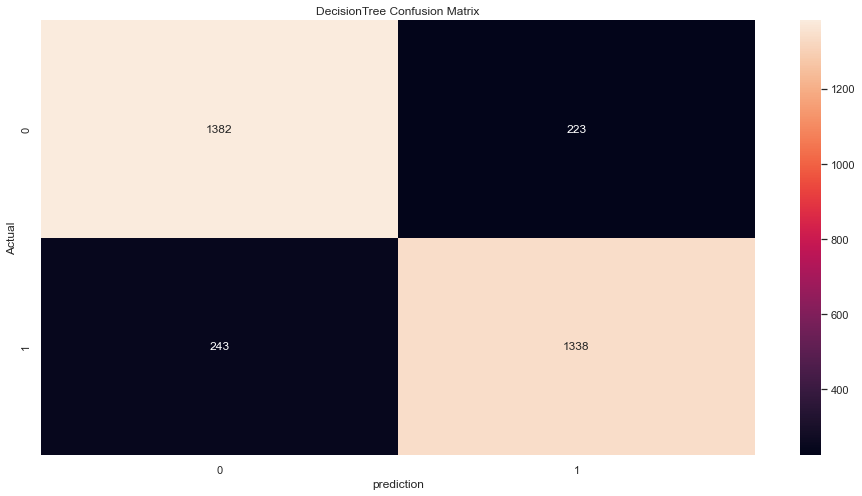

In [ ]:
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score
#Model
tree = DecisionTreeClassifier(criterion='entropy', max_depth=10)

#Training
time_1 = time.time()
tree.fit(x_train, y_train)
time_2 = time.time()



#Time
time_interval = time_2 - time_1
print("Training time :" , time_interval , "Seconds")

#Accuracy
tree_predict = tree.predict(x_test)
print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


tree_predict1 = tree.predict(x_train)
print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

print("precision : ",precision_score(y_test, tree_predict))
print("recall    : ",recall_score(y_test, tree_predict))
print("f1_score  : ",f1_score(y_test, tree_predict))

tree_predict2 = tree.predict_proba(x_test)
pos_probs = tree_predict2[:, 1]
print("ROC_AUC   : ",roc_auc_score(y_test, pos_probs))

cf1 = confusion_matrix(y_test,tree_predict)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('DecisionTree Confusion Matrix')
plt.show()

from the previous output we can clearly see that this model a good accuracy, recall and precision also a low loss(MSE) and wasn't overfitted

<h4>The Random Forest Classifer</h4>

we will do the same as DTC but we will use more parameters to prevent overfitting like max_depth which describes the maximum depth the tree can reach, max_features: the maximum number of features a node needs to split, min_samples_split: minimunm number of samples need for splitting, n_estimators : the number of trees used in the forest)

Training time : 1.2486913204193115 Seconds
Testing accuracy    : 87.85310734463276 %
MSE [TEST]          : 0.12146892655367232
Training accuracy   : 100.0 %
MSE [TRAIN]         : 0.0
precision :  0.8871595330739299
recall    :  0.8652751423149905
f1_score  :  0.8760806916426513
ROC_AUC   :  0.9487076872754929


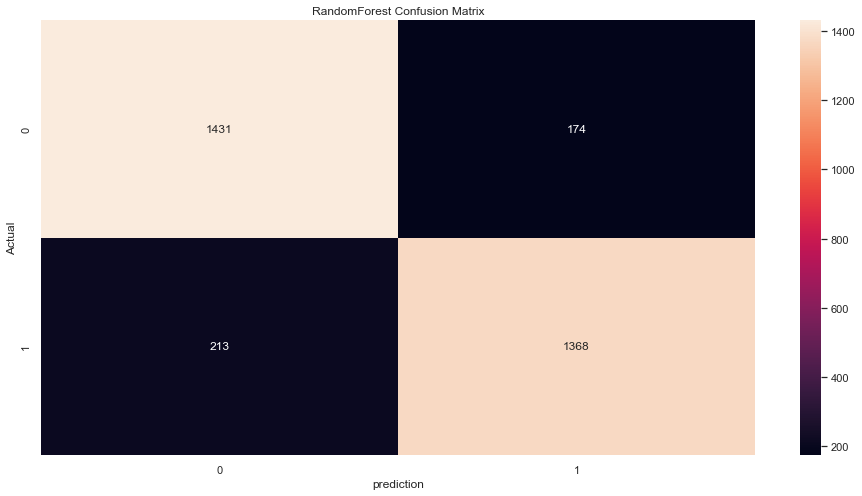

In [ ]:
RF1_model = RandomForestClassifier(random_state=42)

time_1 = time.time()
RF1_model.fit(x_train, y_train)
time_2 = time.time()

#Time
time_interval = time_2 - time_1
print("Training time :" , time_interval , "Seconds")

#Accuracy
tree_predict = RF1_model.predict(x_test)
print("Testing accuracy    :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


tree_predict1 = RF1_model.predict(x_train)
print("Training accuracy   :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

print("precision : ",precision_score(y_test, tree_predict))
print("recall    : ",recall_score(y_test, tree_predict))
print("f1_score  : ",f1_score(y_test, tree_predict))

tree_predict2 = RF1_model.predict_proba(x_test)
pos_probs = tree_predict2[:, 1]
print("ROC_AUC   : ",roc_auc_score(y_test, pos_probs))

cf1 = confusion_matrix(y_test,tree_predict)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('RandomForest Confusion Matrix')
plt.show()


<h4>The XGBoost Classifer</h4>

here we start with boosting algorithms, with is another type of the tree based algorithms here we see two new three new parameters the gamma : controls the minimum reduction in the loss function required to grow a new node in the tree. Learning_rate: learning rate of gradient based optimization, min_child_weight: if the weight of a node is less than this value node will split

Training time : 0.8507225513458252 Seconds
Testing accuracy   : 88.22975517890772 %
MSE [TEST]          : 0.11770244821092278
Training accuracy  : 95.40816326530613 %
MSE [TRAIN]         : 0.04591836734693878
precision :  0.8910505836575876
recall    :  0.8690702087286527
f1_score  :  0.8799231508165225
ROC_AUC   :  0.9510708353284033


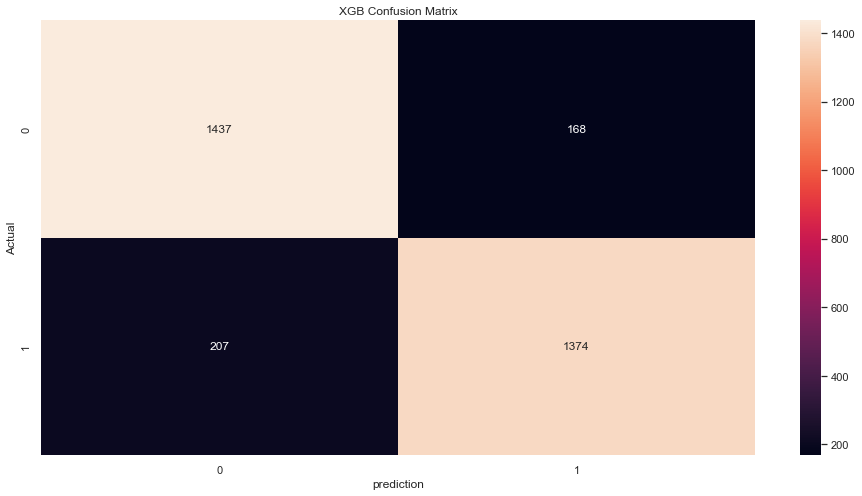

In [ ]:
xgb_model = XGBClassifier(random_state=42)

time_1 = time.time()
xgb_model.fit(x_train, y_train)
time_2 = time.time()



#Time
time_interval = time_2 - time_1
print("Training time :" , time_interval , "Seconds")

#Accuracy
tree_predict = xgb_model.predict(x_test)
print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


tree_predict1 = xgb_model.predict(x_train)
print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

print("precision : ",precision_score(y_test, tree_predict))
print("recall    : ",recall_score(y_test, tree_predict))
print("f1_score  : ",f1_score(y_test, tree_predict))

tree_predict2 = xgb_model.predict_proba(x_test)
pos_probs = tree_predict2[:, 1]
print("ROC_AUC   : ",roc_auc_score(y_test, pos_probs))

cf1 = confusion_matrix(y_test,tree_predict)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('XGB Confusion Matrix')
plt.show()

<h1>GradientBoosting</h1>

one more importent parameter is subsample : the percentage of rows used per building a new tree

Training time : 1.5139753818511963 Seconds
Testing accuracy   : 86.28374136848713 %
MSE [TEST]          : 0.13716258631512868
Training accuracy  : 88.00627943485087 %
MSE [TRAIN]         : 0.11993720565149137
precision :  0.8783068783068783
recall    :  0.8399746995572422
f1_score  :  0.8587132234076948
ROC_AUC   :  0.943233412347956


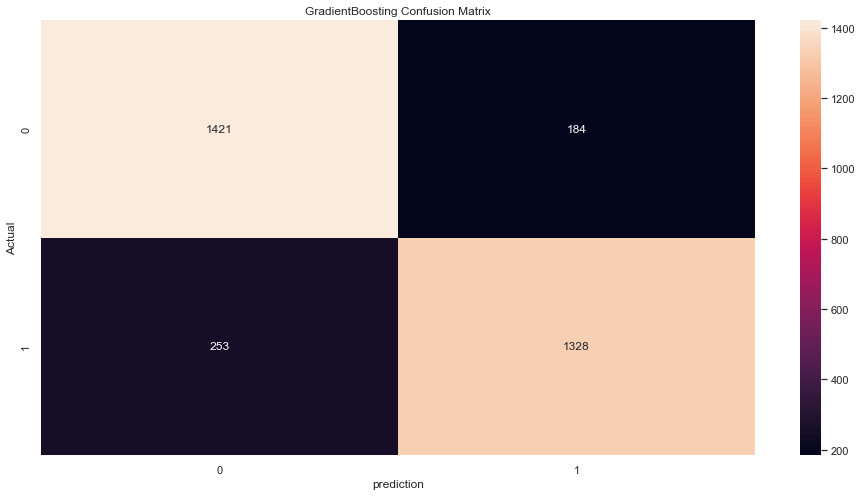

In [ ]:
model=GradientBoostingClassifier(random_state = 12345)

time_1 = time.time()
model.fit(x_train, y_train)
time_2 = time.time()


#Time
time_interval = time_2 - time_1
print("Training time :" , time_interval , "Seconds")

#Accuracy
y_pred = model.predict(x_test)
print("Testing accuracy   :",metrics.accuracy_score(y_test, y_pred)*100 , "%")
print("MSE [TEST]          :",mean_squared_error(y_test, y_pred))

y_pred1 = model.predict(x_train)
print("Training accuracy  :",metrics.accuracy_score(y_train, y_pred1)*100 ,"%")
print("MSE [TRAIN]         :",mean_squared_error(y_train, y_pred1))


print("precision : ",precision_score(y_test, y_pred))
print("recall    : ",recall_score(y_test, y_pred))
print("f1_score  : ",f1_score(y_test, y_pred))

y_pred2 = model.predict_proba(x_test)
pos_probs = y_pred2[:, 1]
print("ROC_AUC   : ",roc_auc_score(y_test, pos_probs))

cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('GradientBoosting Confusion Matrix')
plt.show()

<h1>LGBM</h1>

Training time : 0.15558171272277832 Seconds
Testing accuracy   : 87.79033270558693 %
MSE [TEST]          : 0.12209667294413057
Training accuracy  : 92.09576138147567 %
MSE [TRAIN]         : 0.07904238618524333
precision :  0.8926218708827405
recall    :  0.8570524984187223
f1_score  :  0.8744756373023556
ROC_AUC   :  0.9504367479078859


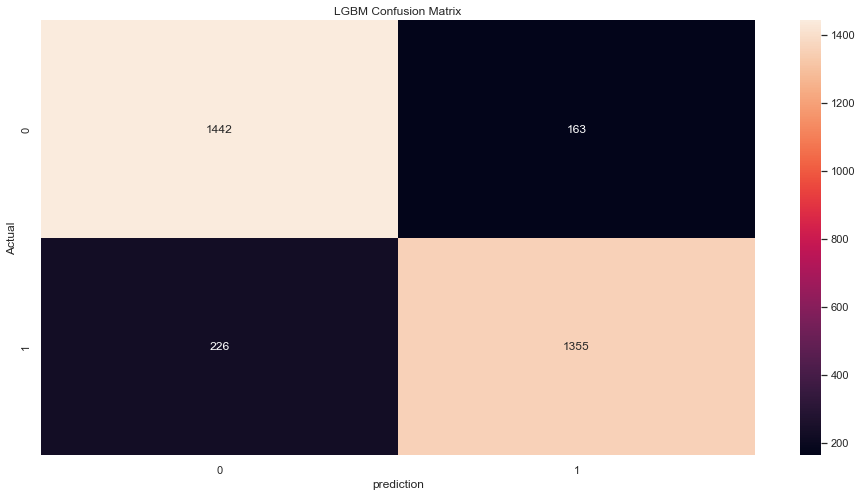

In [ ]:
LGB=LGBMClassifier(random_state = 12345)

time_1 = time.time()
LGB.fit(x_train, y_train)
time_2 = time.time()



#Time
time_interval = time_2 - time_1
print("Training time :" , time_interval , "Seconds")

#Accuracy
y_pred = LGB.predict(x_test)
print("Testing accuracy   :",metrics.accuracy_score(y_test, y_pred)*100 , "%")
print("MSE [TEST]          :",mean_squared_error(y_test, y_pred))

y_pred1 = LGB.predict(x_train)
print("Training accuracy  :",metrics.accuracy_score(y_train, y_pred1)*100 ,"%")
print("MSE [TRAIN]         :",mean_squared_error(y_train, y_pred1))


print("precision : ",precision_score(y_test, y_pred))
print("recall    : ",recall_score(y_test, y_pred))
print("f1_score  : ",f1_score(y_test, y_pred))

y_pred2 = LGB.predict_proba(x_test)
pos_probs = y_pred2[:, 1]
print("ROC_AUC   : ",roc_auc_score(y_test, pos_probs))


cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('LGBM Confusion Matrix')
plt.show()

<h1>CatBoost</h1>

catboost is a itrative machine learning algorithm

Training time : 0.15558171272277832 Seconds
Testing accuracy   : 87.91588198367859 %
MSE [TEST]          : 0.12084118016321406
Training accuracy  : 92.59026687598116 %
MSE [TRAIN]         : 0.07409733124018839
precision :  0.8908496732026144
recall    :  0.8621125869702719
f1_score  :  0.8762455801992928
ROC_AUC   :  0.9531713238003472


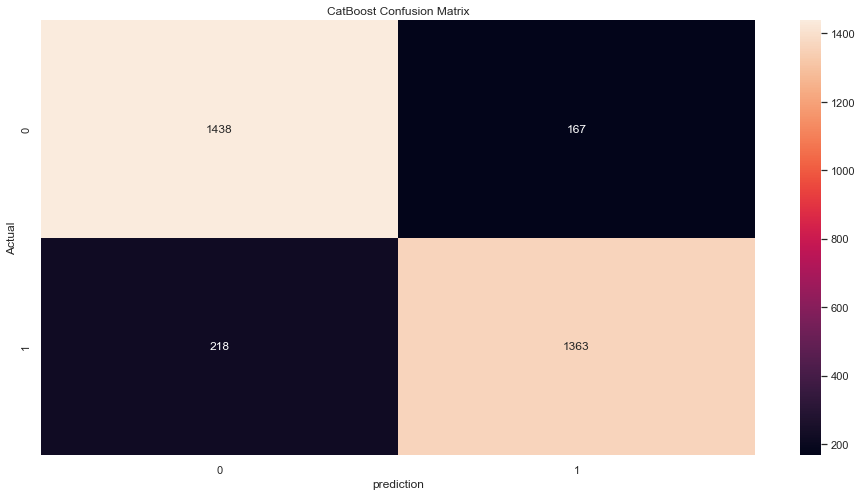

In [ ]:
CatB=CatBoostClassifier(verbose=0,random_state = 12345)

CatB.fit(x_train, y_train)

#Time
time_interval = time_2 - time_1
print("Training time :" , time_interval , "Seconds")

#Accuracy
y_pred = CatB.predict(x_test)
print("Testing accuracy   :",metrics.accuracy_score(y_test, y_pred)*100 , "%")
print("MSE [TEST]          :",mean_squared_error(y_test, y_pred))

y_pred1 = CatB.predict(x_train)
print("Training accuracy  :",metrics.accuracy_score(y_train, y_pred1)*100 ,"%")
print("MSE [TRAIN]         :",mean_squared_error(y_train, y_pred1))


print("precision : ",precision_score(y_test, y_pred))
print("recall    : ",recall_score(y_test, y_pred))
print("f1_score  : ",f1_score(y_test, y_pred))

y_pred2 = CatB.predict_proba(x_test)
pos_probs = y_pred2[:, 1]
print("ROC_AUC   : ",roc_auc_score(y_test, pos_probs))

cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('CatBoost Confusion Matrix')
plt.show()


<h1>after we saw the models we now shall see how we rached those best parameters<h1>

for this we will use the grideSearch which is an exhustive algorithm which means that it will try every posible combination of parameters to reach the heighest accuracy

for the following section we have a list of posible parameters calles grid that we give to gridSearch to try on the models like param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
here the model try to find the best combination like [gamma:0.1, min_child_weight:10, ...] and so on then it will fit the model with those parameters

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score),
           'f1_score': make_scorer(f1_score),'roc_auc':make_scorer(roc_auc_score)}

# **XGBoost Gridsearch**

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Testing accuracy   : 88.63779033270559 %
MSE [TEST]          : 0.11362209667294414
Training accuracy  : 99.70957613814757 %
MSE [TRAIN]         : 0.002904238618524333
precision :  0.8919614147909968
recall    :  0.877292852624921
f1_score  :  0.8845663265306122
ROC_AUC   :  0.9530412747955177


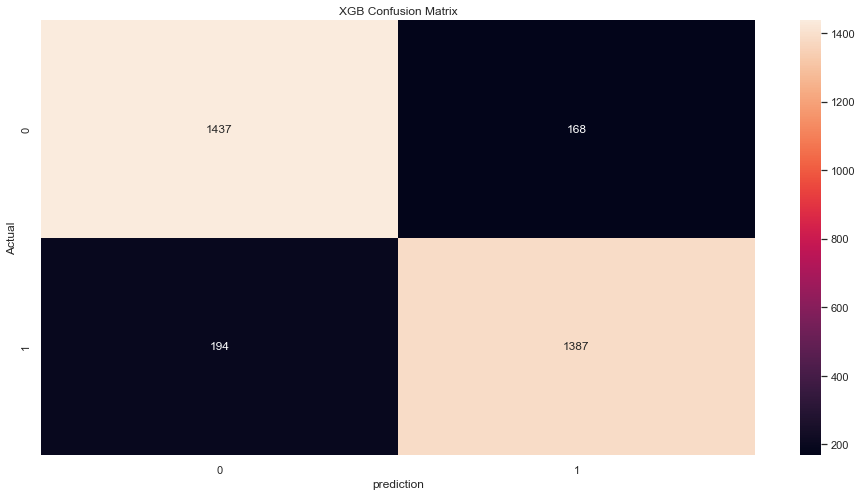

{'gamma': 0.01, 'learning_rate': 0.3, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6358
           1       1.00      1.00      1.00      6382

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1605
           1       0.89      0.88      0.88      1581

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186



In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from xgboost import XGBClassifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.0001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_model = XGBClassifier(random_state=42)
xgb_model = GridSearchCV(estimator=xgb_model, 
                             param_grid=param_grid, 
                             scoring = scoring , 
                             refit="f1_score",
                             return_train_score=True,
                             n_jobs = -1, verbose = 2).fit(x_train, y_train)


###########
#Accuracy
tree_predict = xgb_model.predict(x_test)
print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


tree_predict1 = xgb_model.predict(x_train)
print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

print("precision : ",precision_score(y_test, tree_predict))
print("recall    : ",recall_score(y_test, tree_predict))
print("f1_score  : ",f1_score(y_test, tree_predict))

tree_predict2 = xgb_model.predict_proba(x_test)
pos_probs = tree_predict2[:, 1]
print("ROC_AUC   : ",roc_auc_score(y_test, pos_probs))

cf1 = confusion_matrix(y_test,tree_predict)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('XGB Confusion Matrix')
plt.show()



##########

print(xgb_model.best_params_)
print(classification_report(y_train,  xgb_model.predict(x_train)))
print(classification_report(y_test,  xgb_model.predict(x_test)))

# **GradientBoosting Gridsearch** 

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Testing accuracy   : 88.44946641556811 %
MSE [TEST]          : 0.1155053358443189
Training accuracy  : 92.44897959183673 %
MSE [TRAIN]         : 0.07551020408163266
precision :  0.892049127343245
recall    :  0.872865275142315
f1_score  :  0.8823529411764706
ROC_AUC   :  0.9500852215069527


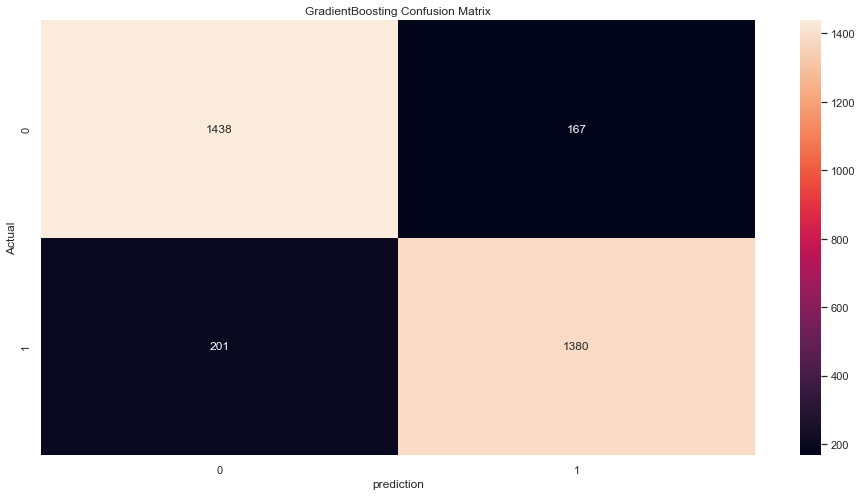

{'learning_rate': 0.05, 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 300, 'n_iter_no_change': 20, 'subsample': 0.75, 'tol': 0.01, 'validation_fraction': 0.2}
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6358
           1       0.94      0.91      0.92      6382

    accuracy                           0.92     12740
   macro avg       0.92      0.92      0.92     12740
weighted avg       0.92      0.92      0.92     12740

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1605
           1       0.89      0.87      0.88      1581

    accuracy                           0.88      3186
   macro avg       0.88      0.88      0.88      3186
weighted avg       0.88      0.88      0.88      3186



In [ ]:
param_grid = {
    'n_estimators': [100, 300],
    'subsample': [0.66, 0.75],
    'learning_rate' : [0.005, 0.05],
    'max_depth': [3,5,7],  # default=3
    'min_samples_split': [2,4, 7],
    'min_samples_leaf': [2, 4,7],
    'max_features': ['auto'],
    'n_iter_no_change': [20],
    'validation_fraction': [0.2],
    'tol': [0.01]
}
scoring = {'accuracy': make_scorer(accuracy_score),
           'f1_score': make_scorer(f1_score),'roc_auc':make_scorer(roc_auc_score)}

gb_model = GradientBoostingClassifier(random_state=42)
gb_model = GridSearchCV(estimator=gb_model, 
                             param_grid=param_grid, 
                             scoring = scoring , 
                             refit="f1_score",
                             return_train_score=True,
                             n_jobs = -1, verbose = 2).fit(x_train, y_train)



#Accuracy
tree_predict = gb_model.predict(x_test)
print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


tree_predict1 = gb_model.predict(x_train)
print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

print("precision : ",precision_score(y_test, tree_predict))
print("recall    : ",recall_score(y_test, tree_predict))
print("f1_score  : ",f1_score(y_test, tree_predict))

tree_predict2 = gb_model.predict_proba(x_test)
pos_probs = tree_predict2[:, 1]
print("ROC_AUC   : ",roc_auc_score(y_test, pos_probs))

cf1 = confusion_matrix(y_test,tree_predict)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('GradientBoosting Confusion Matrix')
plt.show()




print(gb_model.best_params_)
print(classification_report(y_train,  gb_model.predict(x_train)))
print(classification_report(y_test,  gb_model.predict(x_test)))

# **RandomForest Gridsearch**


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Testing accuracy   : 86.4406779661017 %
MSE [TEST]          : 0.13559322033898305
Training accuracy  : 90.11773940345368 %
MSE [TRAIN]         : 0.0988226059654631
precision :  0.872809863724854
recall    :  0.8507273877292852
f1_score  :  0.8616271620755926
ROC_AUC   :  0.9407772595521979


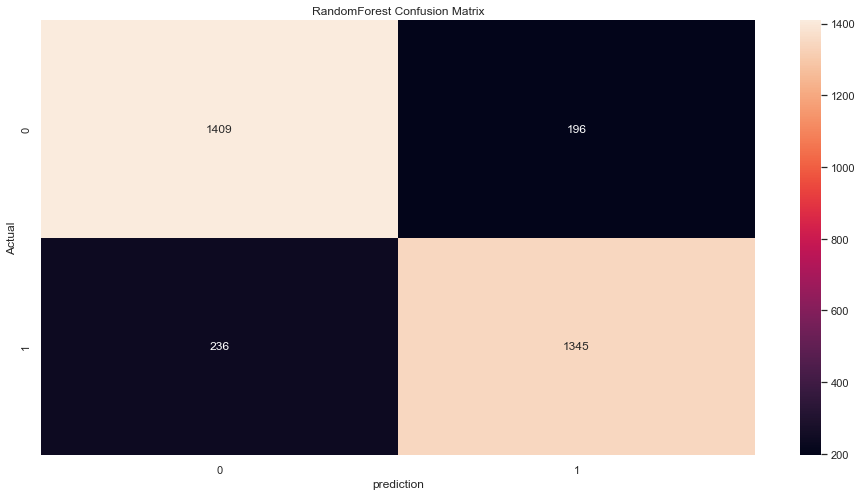

{'max_depth': 9, 'max_features': 5, 'min_samples_split': 6, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6358
           1       0.91      0.89      0.90      6382

    accuracy                           0.90     12740
   macro avg       0.90      0.90      0.90     12740
weighted avg       0.90      0.90      0.90     12740

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1605
           1       0.87      0.85      0.86      1581

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
param_grid = {'max_depth': [3, 5, 7,9], 'max_features': [3,5,7,9,11, 12],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RF_model = RandomForestClassifier(random_state=42)

RF_model = GridSearchCV(estimator=RF_model, 
                             param_grid=param_grid, 
                             scoring = scoring , 
                             refit="f1_score",
                             return_train_score=True,
                             n_jobs = -1, verbose = 2).fit(x_train, y_train)

tree_predict = RF_model.predict(x_test)
print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


tree_predict1 = RF_model.predict(x_train)
print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

print("precision : ",precision_score(y_test, tree_predict))
print("recall    : ",recall_score(y_test, tree_predict))
print("f1_score  : ",f1_score(y_test, tree_predict))

tree_predict2 = RF_model.predict_proba(x_test)
pos_probs = tree_predict2[:, 1]
print("ROC_AUC   : ",roc_auc_score(y_test, pos_probs))

cf1 = confusion_matrix(y_test,tree_predict)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('RandomForest Confusion Matrix')
plt.show()


print(RF_model.best_params_)
print(classification_report(y_train,  RF_model.predict(x_train)))
print(classification_report(y_test,  RF_model.predict(x_test)))

# **LightGradientBossting Machine Gridsearch**

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
Testing accuracy   : 88.1669805398619 %
MSE [TEST]          : 0.11833019460138104
Training accuracy  : 92.14285714285714 %
MSE [TRAIN]         : 0.07857142857142857
precision :  0.8914174252275683
recall    :  0.8671726755218216
f1_score  :  0.8791279256171849
ROC_AUC   :  0.9517139867704696


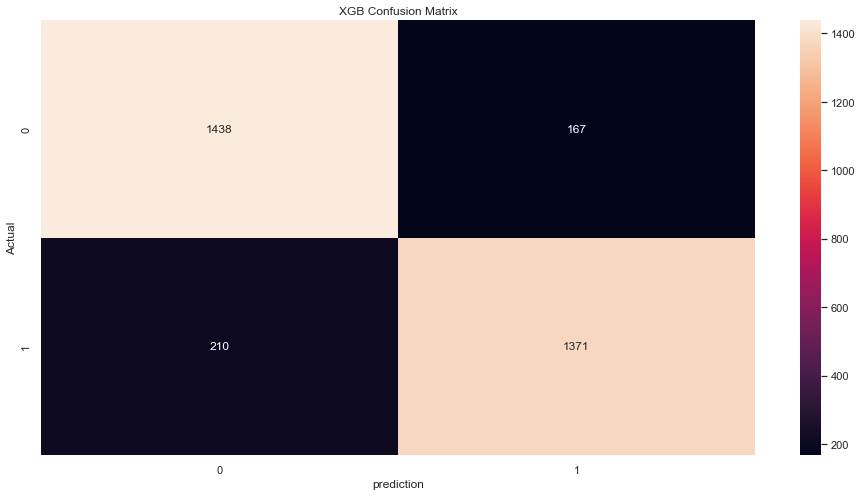

{'feature_fraction': 0.5, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_samples': 10, 'n_estimators': 1000, 'num_leaves': 10, 'reg_alpha': 0.5, 'reg_lambda': 0.1}
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      6358
           1       0.94      0.90      0.92      6382

    accuracy                           0.92     12740
   macro avg       0.92      0.92      0.92     12740
weighted avg       0.92      0.92      0.92     12740

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1605
           1       0.89      0.87      0.88      1581

    accuracy                           0.88      3186
   macro avg       0.88      0.88      0.88      3186
weighted avg       0.88      0.88      0.88      3186



In [ ]:
param_grid = {
    'max_depth': [3,5,7],
    'num_leaves': [5, 10],
    'learning_rate': [0.005, 0.05],
    'n_estimators': [200,500,1000],
    'feature_fraction': [0.5],
    'min_child_samples': [5, 10],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [0.1, 0.5]
}
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model = GridSearchCV(estimator=lgbm_model, 
                             param_grid=param_grid, 
                             scoring = scoring , 
                             refit="f1_score",
                             return_train_score=True,
                             n_jobs = -1, verbose = 2).fit(x_train, y_train)


#Accuracy
tree_predict = lgbm_model.predict(x_test)
print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


tree_predict1 = lgbm_model.predict(x_train)
print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

print("precision : ",precision_score(y_test, tree_predict))
print("recall    : ",recall_score(y_test, tree_predict))
print("f1_score  : ",f1_score(y_test, tree_predict))

tree_predict2 = lgbm_model.predict_proba(x_test)
pos_probs = tree_predict2[:, 1]
print("ROC_AUC   : ",roc_auc_score(y_test, pos_probs))

cf1 = confusion_matrix(y_test,tree_predict)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('XGB Confusion Matrix')
plt.show()



print(lgbm_model.best_params_)
print(classification_report(y_train,  lgbm_model.predict(x_train)))
print(classification_report(y_test,  lgbm_model.predict(x_test)))

# **CatBoost Gridsearch**

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Testing accuracy   : 88.32391713747646 %
MSE [TEST]          : 0.1167608286252354
Training accuracy  : 93.9795918367347 %
MSE [TRAIN]         : 0.06020408163265306
precision :  0.8927875243664717
recall    :  0.8690702087286527
f1_score  :  0.8807692307692307
ROC_AUC   :  0.9520178285362985


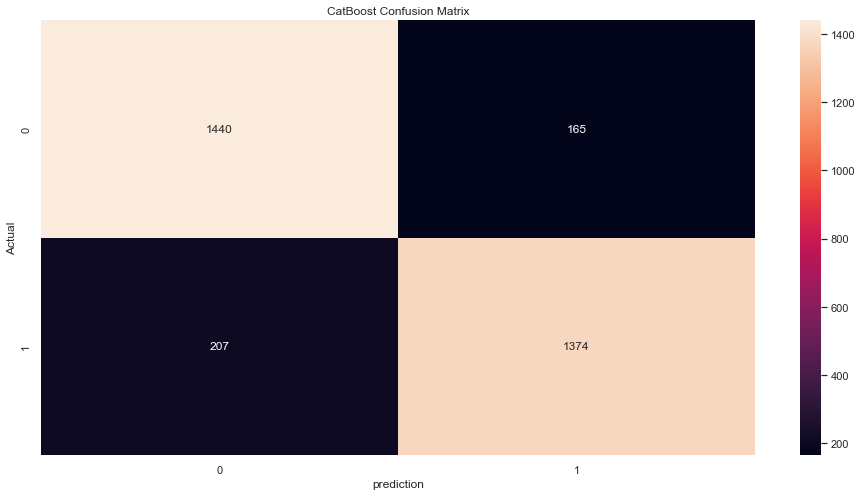

{'depth': 10, 'iterations': 1000, 'l2_leaf_reg': 3, 'learning_rate': 0.01}
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6358
           1       0.95      0.93      0.94      6382

    accuracy                           0.94     12740
   macro avg       0.94      0.94      0.94     12740
weighted avg       0.94      0.94      0.94     12740

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1605
           1       0.89      0.87      0.88      1581

    accuracy                           0.88      3186
   macro avg       0.88      0.88      0.88      3186
weighted avg       0.88      0.88      0.88      3186



In [ ]:
param_grid = {
    'depth': [3,7,10],
    'learning_rate': [0.001, 0.01],
    'iterations': [200,500,1000],
    'l2_leaf_reg': [3,5,7],
}
cb_model = CatBoostClassifier(random_state=42,verbose=0)
cb_model = GridSearchCV(estimator=cb_model, 
                             param_grid=param_grid, 
                             scoring = scoring , 
                             refit="f1_score",
                             return_train_score=True,
                             n_jobs = -1, verbose = 2).fit(x_train, y_train)

#Accuracy
tree_predict = cb_model.predict(x_test)
print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


tree_predict1 = cb_model.predict(x_train)
print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

print("precision : ",precision_score(y_test, tree_predict))
print("recall    : ",recall_score(y_test, tree_predict))
print("f1_score  : ",f1_score(y_test, tree_predict))

tree_predict2 = cb_model.predict_proba(x_test)
pos_probs = tree_predict2[:, 1]
print("ROC_AUC   : ",roc_auc_score(y_test, pos_probs))

cf1 = confusion_matrix(y_test,tree_predict)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('CatBoost Confusion Matrix')
plt.show()

print(cb_model.best_params_)
print(classification_report(y_train,  cb_model.predict(x_train)))
print(classification_report(y_test,  cb_model.predict(x_test)))

finaly the next one is the one with the heighest test recall and percision how ever it seems overfitted it preformes well

the comparison will show use how accurat and precies each model is.
so we will use accuracy, precision, recall, and AUC( the area under the roc curve

In [ ]:
models = []
fpr_list=[]
tpr_list=[]
models.append(('DT',DecisionTreeClassifier(criterion='entropy', max_depth=10)))
models.append(('RFC',RF_model.best_estimator_))
models.append(('XGBoost',xgb_model.best_estimator_))
models.append(('GB',gb_model.best_estimator_))
models.append(('LGB',lgbm_model.best_estimator_))
models.append(('Cat',cb_model.best_estimator_ ))
models_columns = []
models_compare = pd.DataFrame(columns = models_columns)

row_index = 0
for name,alg in models:
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    y_pred_proba = alg.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    models_name = alg.__class__.__name__
    models_compare.loc[row_index,'Model Name'] = models_name
    models_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    models_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    models_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    models_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    models_compare.loc[row_index, 'ROC'] = metrics.auc(fpr, tpr)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

    row_index+=1
    
comparison_df = pd.DataFrame(models_compare)
comparison_df.style.highlight_max(color='indianred', axis=0)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5


,Model Name,Train Accuracy,Test Accuracy,Precission,Recall,ROC
0,DecisionTreeClassifier,0.900900,0.853100,0.856960,0.845035,0.902736
1,RandomForestClassifier,0.901200,0.864400,0.872810,0.850727,0.940777
2,XGBClassifier,0.997100,0.886400,0.891961,0.877293,0.953041
3,GradientBoostingClassifier,0.924500,0.884500,0.892049,0.872865,0.950085
4,LGBMClassifier,0.921400,0.881700,0.891417,0.867173,0.951714
5,CatBoostClassifier,0.939800,0.883200,0.892788,0.869070,0.952018


now we see the XGBoost is the best as it is the one with the best accuracy, how ever it seems overfitted a pit but it works well

<br>
<br>
now in this part we will try to plot the relation between True Positive Rate and False Positive Rate for each model

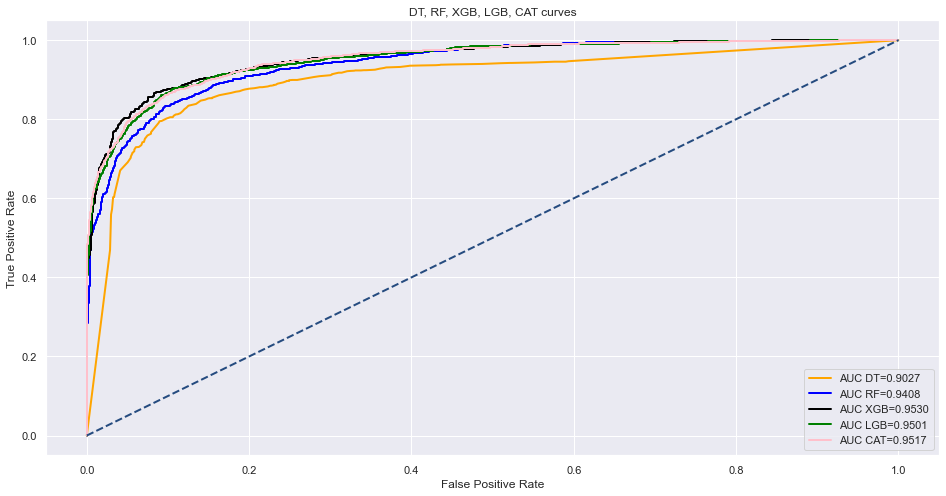

In [ ]:
#fpr = False Positive Rate 
#tpr = True Positive Rate 
#auc = area under cuve it tells how much the model is capable of distinguishing between classes.
#the largest auc is the best algorithm

plt.plot(fpr_list[0],tpr_list[0],'-',lw=2,color='orange',label='AUC DT=%.4f'%comparison_df['ROC'][0])
plt.plot(fpr_list[1],tpr_list[1],'-',lw=2,color='blue',label='AUC RF=%.4f'%comparison_df['ROC'][1])
plt.plot(fpr_list[2],tpr_list[2],'-',lw=2,color='black',label='AUC XGB=%.4f'%comparison_df['ROC'][2])
plt.plot(fpr_list[3],tpr_list[3],'-',lw=2,color='green',label='AUC LGB=%.4f'%comparison_df['ROC'][3])
plt.plot(fpr_list[4],tpr_list[4],'-',lw=2,color='pink',label='AUC CAT=%.4f'%comparison_df['ROC'][4])

plt.plot([0, 1], [0, 1], lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT, RF, XGB, LGB, CAT curves')
plt.legend(loc='lower right')

the erea under those curves will describe the ROC AUC and the best model is XGBoost as the erea under its curve is the biggest(XGBoost is the in black) with AUC equals to 0.953 so in the next part we will fit that one as it is the best of all.

now in the final part we will fit and test and visualize the best model once more to give the last demo about our work, discoveries and andventures in creating a model that predicts if a customer is going to leave or stay

# **Fit best model**

in this section we will fit and test using the fit method and test using the accuracy score, feature importance and confusion matrix

In [ ]:
xgb_model.best_params_

{'gamma': 0.01,
 'learning_rate': 0.3,
 'max_depth': 8,
 'min_child_weight': 1,
 'n_estimators': 100}

Accuracy:  88.63779033270559 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6358
           1       1.00      1.00      1.00      6382

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1605
           1       0.89      0.88      0.88      1581

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186



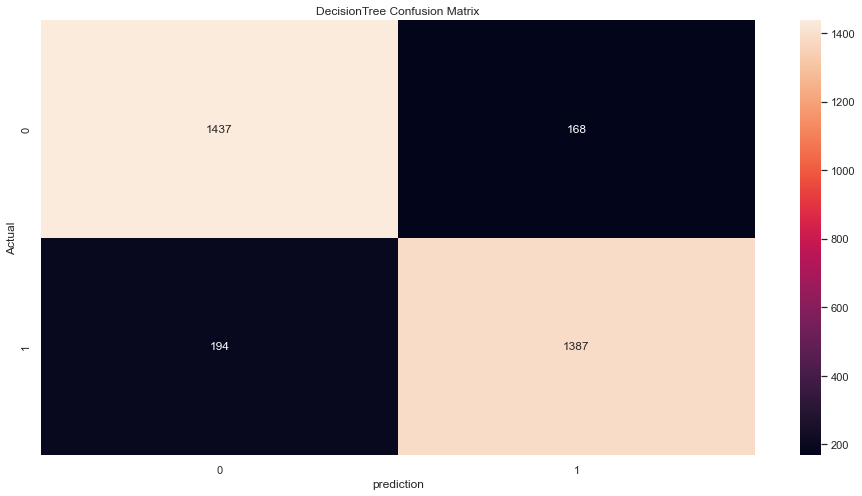

In [ ]:
#best model
model=XGBClassifier(gamma=0.01, learning_rate=0.3, max_depth=8, min_child_weight = 1,n_estimators = 100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Accuracy: ",accuracy*100,"%")
print(classification_report(y_train,  model.predict(x_train)))
print(classification_report(y_test,  model.predict(x_test)))

cf1 = confusion_matrix(y_test,y_pred)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('DecisionTree Confusion Matrix')
plt.show()

looking to the numbers and heatmap we saw that the model preformes well and is not badly confused

<br>
<br>
<br>
<br>
in this section let's look at the roc curve(Receiver operating characteristic)

In [ ]:
xgb_model.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_gamma', 'param_learning_rate', 'param_max_depth', 'param_min_child_weight', 'param_n_estimators', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_train_accuracy', 'split1_train_accuracy', 'split2_train_accuracy', 'split3_train_accuracy', 'split4_train_accuracy', 'mean_train_accuracy', 'std_train_accuracy', 'split0_test_f1_score', 'split1_test_f1_score', 'split2_test_f1_score', 'split3_test_f1_score', 'split4_test_f1_score', 'mean_test_f1_score', 'std_test_f1_score', 'rank_test_f1_score', 'split0_train_f1_score', 'split1_train_f1_score', 'split2_train_f1_score', 'split3_train_f1_score', 'split4_train_f1_score', 'mean_train_f1_score', 'std_train_f1_score', 'split0_test_roc_auc', 'split1_test_roc_auc', 'split2_test_roc_auc', 'split3_test_roc_auc', 's

In [ ]:
res = pd.DataFrame(xgb_model.cv_results_)
check = res[['params','mean_test_accuracy','mean_train_accuracy']]
check.head()

,params,mean_test_accuracy,mean_train_accuracy
0,"{'gamma': 0.01, 'learning_rate': 0.05, 'max_de...",0.830848,0.835930
1,"{'gamma': 0.01, 'learning_rate': 0.05, 'max_de...",0.836421,0.843779
2,"{'gamma': 0.01, 'learning_rate': 0.05, 'max_de...",0.844427,0.852963
3,"{'gamma': 0.01, 'learning_rate': 0.05, 'max_de...",0.869152,0.887402
4,"{'gamma': 0.01, 'learning_rate': 0.05, 'max_de...",0.831711,0.835165


In [ ]:
check[check.mean_train_accuracy-check.mean_test_accuracy<.05].sort_values(by='mean_test_accuracy',ascending=False).head(100)

,params,mean_test_accuracy,mean_train_accuracy
103,"{'gamma': 0.01, 'learning_rate': 0.2, 'max_dep...",0.882810,0.919662
79,"{'gamma': 0.01, 'learning_rate': 0.1, 'max_dep...",0.882496,0.928002
287,"{'gamma': 0.001, 'learning_rate': 0.1, 'max_de...",0.881947,0.927080
479,"{'gamma': 0.0001, 'learning_rate': 0.1, 'max_d...",0.881947,0.927080
487,"{'gamma': 0.0001, 'learning_rate': 0.2, 'max_d...",0.881868,0.919329
...,...,...,...
510,"{'gamma': 0.0001, 'learning_rate': 0.2, 'max_d...",0.872057,0.900726
526,"{'gamma': 0.0001, 'learning_rate': 0.2, 'max_d...",0.871900,0.900962
334,"{'gamma': 0.001, 'learning_rate': 0.2, 'max_de...",0.871900,0.900981
373,"{'gamma': 0.001, 'learning_rate': 0.3, 'max_de...",0.871743,0.920899


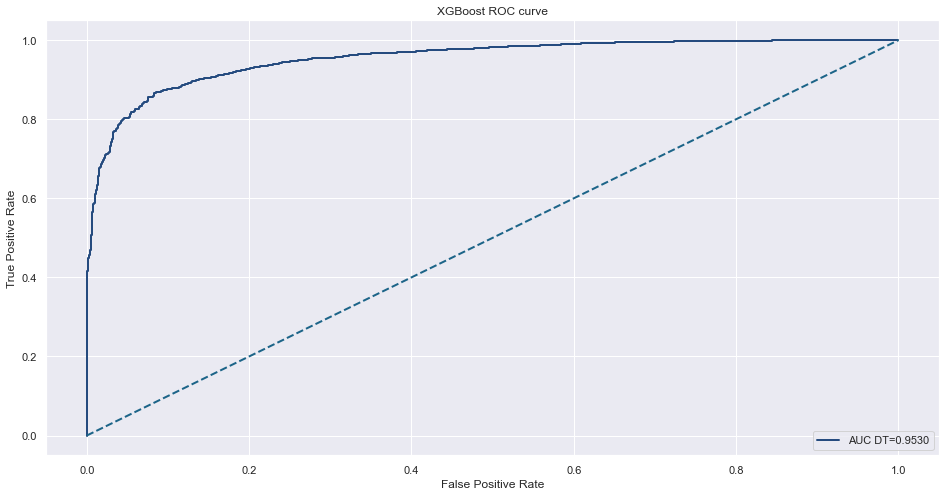

In [ ]:
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = metrics.auc(fpr,tpr)

plt.plot(fpr,tpr,'-',lw=2,label='AUC DT=%.4f'%auc)

plt.plot([0, 1], [0, 1], lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
plt.legend(loc='lower right')

as we illustrated before this curve tells use how good the model is preforming

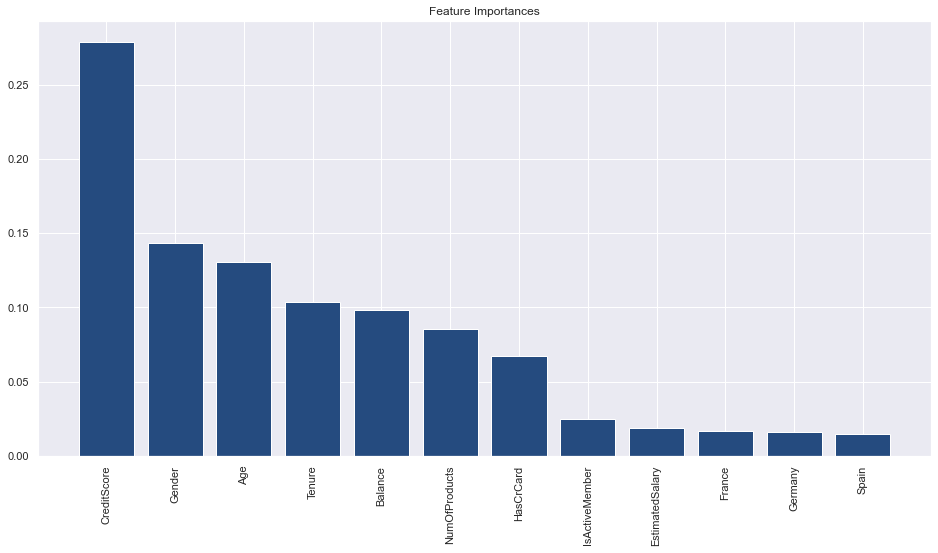

In [ ]:
# Visualization of the Feature importances
features_label = x_train.columns
plt.title('Feature Importances')
plt.bar(range(x_train.shape[1]), importances[indices], align = "center")
plt.xticks(range(x_train.shape[1]), features_label, rotation = 90)
plt.show()

looking at that we see that credit score heighly effects the results of the model it is heighly important to use it, then see age comes after it then tenure; those the model sees ase the most effective and important features then comes the rest with clearly lower importance and at the end comes Gender and Geography as the least important features

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br> <h5>At the end a special Thank to every one help us</h5>
how every every team member was doing one task, we also did a lot of cross functioning to ease and speed up the process


# Neural Networks

As we will use a Neural Network all the data shall be scalled so we will use the standerd scaller for this job

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scalled = sc.fit_transform(X)

now after scalling we will now split the data to train and test the nn

In [ ]:
x_trSc, x_tsSc, y_trSc, y_tsSc = train_test_split(X_scalled, Y, random_state=42, test_size=0.20)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

we will be using the Sequential Model from kerae API and dropout to reduce the chance of overfitting an Dense as our fully connected layer

In [ ]:
ANN_model = Sequential([
    Dense(128, activation = 'relu', input_dim = x_trSc.shape[1]),
    Dropout(0.70),
    Dense(32, activation = 'relu'),
    Dropout(0.50),
    Dense(32, activation = 'relu'),
    Dropout(0.20),
    Dense(1, activation = 'sigmoid')])

In [ ]:
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

model will use binary-crossentropy as its loss and adam for optimizing loss

In [ ]:
ANN_model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

the we will fit the model on the train data the evaluat it on test data with batch size of 32 and 40 epochs

In [ ]:
result = ANN_model.fit(x_trSc, y_trSc, batch_size = 32, epochs = 40, validation_data = (x_tsSc, y_tsSc), validation_split=0.2)
y_hatANN = ANN_model.predict(x_tsSc)
y_hatANN

Epoch 1/40
319/319 [==============================] - 2s 3ms/step - loss: 0.5701 - accuracy: 0.6990 - val_loss: 0.4181 - val_accuracy: 0.8238
Epoch 2/40
319/319 [==============================] - 1s 2ms/step - loss: 0.4653 - accuracy: 0.7921 - val_loss: 0.3819 - val_accuracy: 0.8375
Epoch 3/40
319/319 [==============================] - 1s 2ms/step - loss: 0.4308 - accuracy: 0.8077 - val_loss: 0.3609 - val_accuracy: 0.8426
Epoch 4/40
319/319 [==============================] - 1s 2ms/step - loss: 0.4071 - accuracy: 0.8192 - val_loss: 0.3520 - val_accuracy: 0.8501
Epoch 5/40
319/319 [==============================] - 1s 2ms/step - loss: 0.3963 - accuracy: 0.8286 - val_loss: 0.3367 - val_accuracy: 0.8501
Epoch 6/40
319/319 [==============================] - 1s 2ms/step - loss: 0.3842 - accuracy: 0.8342 - val_loss: 0.3346 - val_accuracy: 0.8552
Epoch 7/40
319/319 [==============================] - 1s 2ms/step - loss: 0.3827 - accuracy: 0.8344 - val_loss: 0.3338 - val_accuracy: 0.8560
Epoch 

array([[0.07652536],
       [0.23931104],
       [0.15966585],
       ...,
       [0.06544688],
       [0.1680333 ],
       [0.82545936]], dtype=float32)

In [ ]:
threshold = y_hatANN.mean()
y_hatANNb = np.where(y_hatANN > threshold,1,0)
accuracy_score(y_tsSc, y_hatANNb)

0.8625235404896422